# Linear Regression using sklearn

## Simple Linear Regression

### Import the relevant libraries

In [458]:
# For these lessons we need NumPy, pandas, matplotlib and seaborn libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [459]:
# We need to access the data
import os
working_directory = os.getcwd()

### Load the data

In [461]:
path1 = working_directory + '/1.01. Simple linear regression.csv'

In [462]:
# Read the dataframe
data = pd.read_csv(path1)

# Let's explore the top 5 rows of the df
data.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create the regression

#### Declare the dependent and independent variables

In [465]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [466]:
# let's check the shapes of the features
x.shape

(84,)

In [467]:
# let's check the shapes of the target too
y.shape

(84,)

In [468]:
# In order to feed x to sklearn, it should be a 2D array (a matrix), therefore, we must reshape it 
# This will not be needed when the data has more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Regression itself

In [470]:
# We start by creating a linear regression object
reg = LinearRegression()

In [471]:
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)

LinearRegression()

In [472]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679754

### Coefficients

In [474]:
# This is a beta_1 coefficient
# Note that the output is an array, as we usually expect several coefficients
beta1 = reg.coef_
beta1

array([0.00165569])

### Intercept

In [476]:
# This is a intercept or beta0
beta0 = reg.intercept_
beta0

0.2750402996602799

In [477]:
# The result is an array too, as we can predict more than one value at a time
x0 = np.array(1740)
x0_matrix = x0.reshape(-1,1)

reg.predict(x0_matrix )

array([3.15593751])

In [478]:
x0 = np.array([[1740]])
prediction = reg.predict(x0)
prediction

array([3.15593751])

In [479]:
# We can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
# wecan also write like this : new_data = pd.DataFrame({'SAT': [1740,1760]})
new_data

,SAT
0,1740
1,1760


In [480]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

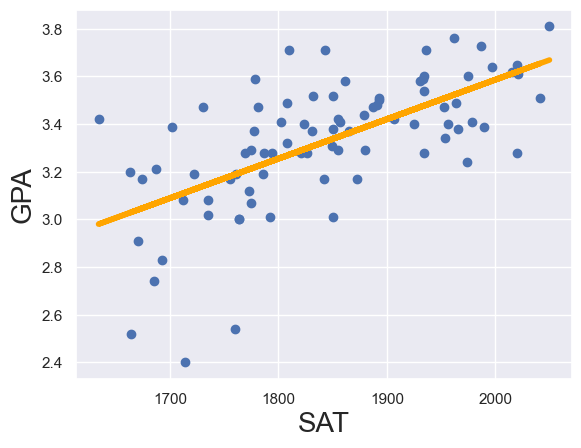

In [481]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
# yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Multiple Linear Regression

In [483]:
path2 = working_directory + '/1.02. Multiple linear regression.csv'
data2 = pd.read_csv(path2)
data2.head(5)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [484]:
data2.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


### Create the multiple linear regression

#### Declare the dependent and independent variables¶

In [487]:
# There are two independent variables: 'SAT' and 'Rand 1,2,3'
x = data2[['SAT','Rand 1,2,3']]

# and a single depended variable: 'GPA'
y = data2['GPA']

#### Regression model

In [489]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(x,y)

LinearRegression()

In [490]:
# Coefficient beta1
reg.coef_

array([ 0.00165354, -0.00826982])

In [491]:
reg.intercept_

0.29603261264909486

#### Calculating the R-squared

In [493]:
# Get the R-squared of the regression
reg.score(x,y)

0.40668119528142843

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [495]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
x.shape

(84, 2)

In [496]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
R2 = reg.score(x,y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

##### Adjusted R-squared

Using the code from the lecture, create a function which will calculate the adjusted R-squared for you, given the independent variable(s) (x) and the dependent variable (y).

In [498]:
# Adjusted R-squared function

def adj_R2(x,y):
    R2 = reg.score
    n = x.shape[0]
    p = y.shape[1]
    adjusted_r2 = 1-(1-R2)*(n-1)/(n-p-1)
    return adjusted_r2

### Feature selection
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

F_regression creates simple linear regression of each feature and the dependent variable. 

In [501]:
# Import the feature selection module from sklearn
# This module allows us to select the most appopriate features for our regression
# There exist many different approaches to feature selection, however, we will use one of the simplest
from sklearn.feature_selection import f_regression

f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables. In our case, this would mean running a simple linear regression on GPA where SAT is the independent variable and a simple linear regression on GPA where Rand 1,2,3 is the indepdent variable. The limitation of this approach is that it does not take into account the mutual effect of the two features. 

In [503]:
# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [504]:
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

Note : $e^{-11} = * 10^{-11}$

In [506]:
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.   , 0.676])

These are univariate p_values reached from single linear models. They do not reflect the interconnection of the features in our multiple linear regression. We can see p_value for variable rand 1,2,3 is greater than 0.05. It means variable 1,2,3 is useless here. 

### Creating a summary table

In [509]:
# Let's create a new data frame with the names of the features
# reg_summary = pd.DataFrame(data = ['SAT', 'Rand 1,2,3'], columns=['Features']) 
# The code here is more efficient for more features
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [510]:
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary ['Coefficients'] = reg.coef_
# Finally, we add the p-values we just calculated
reg_summary ['p-values'] = p_values.round(3)

In [511]:
# Now we've got a pretty clean summary, which can help us make an informed decision about the inclusion of the variables 
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### How to include p-values in sklearn

In [513]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
from scipy import stats
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362

class LinearRegression(SklearnLinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (n_features,)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, fit_intercept=True, copy_X=True, n_jobs=None, positive=False):
        super().__init__(fit_intercept=fit_intercept, copy_X=copy_X, n_jobs=n_jobs, positive=positive)
    
    def fit(self, X, y):
        super().fit(X, y)
        
        # Calculate SSE (sum of squared errors)
        residuals = self.predict(X) - y
        sse = np.sum(residuals ** 2) / float(X.shape[0] - X.shape[1])
        
        # Calculate the standard error
        se = np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))

        # Compute the t-statistic for each feature
        self.t = self.coef_ / se
        
        # Find the p-value for each feature
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), df=X.shape[0] - X.shape[1]))
        return self

In [514]:
# When we create the regression everything is the same
reg_with_pvalues = LinearRegression()
reg_with_pvalues.fit(x,y)

LinearRegression()

In [515]:
# The difference is that we can check what's contained in the local variable 'p' in an instance of the LinearRegression() class
reg_with_pvalues.p

array([0.        , 0.75717067])

In [516]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame([['SAT'],['Rand 1,2,3']],columns =['Features'])
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary['Coefficients'] = reg_with_pvalues.coef_
# Finally, we add the p-values we just calculated
reg_summary['p-values'] = reg_with_pvalues.p.round(3)

In [517]:
# This result is identical to the one from StatsModels
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.757


### Standardization

Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardization or feature scaling is the process of transforming data into a standard scale.

Standardized variable $= \frac{x-\mu}{\sigma}$

In [522]:
# Import the preprocessing module
# StandardScaler is one of the easiest and 'cleanest' ways to preprocess your data
from sklearn.preprocessing import StandardScaler

In [523]:
# Create a StandardScaler instance
# scaler contains all standardization info
scaler = StandardScaler()

In [524]:
# Fit the input data (x)
# Essentially we are calculating the mean and standard deviation feature-wise 
# (the mean of 'SAT' and the standard deviation of 'SAT', as well as the mean of 'Rand 1,2,3' and the standard deviation of 'Rand 1,2,3')
scaler.fit(x)

StandardScaler()

In [525]:
# The actual scaling of the data is done through the method 'transform()'
# Let's store it in a new variable, named appropriately
x_scaled = scaler.transform(x)

In [526]:
# The result is an ndarray
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

### Feature selection through Standardization

#### Regression with scaled features

In [529]:
# Creating a regression works in the exact same way
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x_scaled,y)

LinearRegression()

In [530]:
# Let's see the coefficients
reg.coef_

array([ 0.17181389, -0.00703007])

In [531]:
# And the intercept
reg.intercept_

3.330238095238095

In [532]:
# When doing ML we perform some sort of scaling

reg_summary = pd.DataFrame([['BIAS'],['SAT'],['Rand 1,2,3']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [533]:
# Now we have a pretty clean summary, which can help us make an informed decision about the importance of each feature
reg_summary

,Features,Weights
0,BIAS,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


The closer a weight is to 0, the smaller its impact. The bigger the weight, the bigger its impact.

## Making predictions with the standardized coefficients (weights)

In [536]:
# For simplicity, let's crete a new dataframe with 2 *new* observations
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [537]:
# Note that the output is very strange
reg.predict(new_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

In [538]:
# Our model is expecting SCALED features (features of different magnitude)
# In fact we must transform the 'new data' in the same way as we transformed the inputs we train the model on
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [539]:
# Finally we make a prediction using the scaled new data
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

This is GPA's prediction for SAT 1700 and 1800 respectively.

#### What if we removed the 'Random 1,2,3' variable?

In [542]:
# Theory suggests that features with very small weights could be removed and the results should be identical
# Let's create a simple linear regression (simple, because there is a single feature) without 'Rand 1,2,3'
reg_simple = LinearRegression()

# Once more, we must reshape the inputs into a matrix, otherwise we will get a compatibility error 
# Note that instead of standardizing again, I'll simply take only the first column of x
x_simple_matrix = x_scaled[:,0].reshape(-1,1)

# Finally, we fit the regression
reg_simple.fit(x_simple_matrix,y)

LinearRegression()

In [543]:
# In a similar manner to the cell before, we can predict only the first column of the scaled 'new data'
# Note that we also reshape it to be exactly the same as x
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

The predicted GPA is slightly different but actually if we round up to two digits, we got the exact same results.